# Q&A Activity Question Week -10
Do the following on the dataset
1.Load the data into the pandas environment and identify some basic details of the dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

1. Load the data into the pandas environment and identify some basic details of the dataset.

In [4]:
data = data=pd.read_csv('employee.csv')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [8]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [9]:
data.shape

(9, 7)

In [13]:
data.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [16]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

Insight: The data contains 9 rows and 7 columns of which 3 columns(Age, income and gender) contains null values.() 

2. Reset the index as "name" as the index

In [30]:
mdata = data.set_index('name')
mdata

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [31]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


3. Select rows for specific names Jack Morgan and Josh wills.

In [32]:
mdata.loc[['Jack Morgan', 'Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


4. Select data for multiple values "Sales" and “Finance”.

In [33]:
data.loc[data['department'].isin(['Sales', 'Finance'])]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


Insight: Two row are excluded.

5. Display employee who has more than 700 performance score.

In [35]:
data[data.performance_score > 700]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


6. Display employee who has more than 500 and less than 700 performance score.

In [38]:
data[(data.performance_score > 500) & (data.performance_score < 700)]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


7. Check and handle missing values in the dataset.

Checking NaN values

In [39]:
data.isnull().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [40]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


Analysis: We need to deal with 6 null values. The two categories are numerical and the remaining is a categorical data. And on looking at the data, we are replacing the null values under age categoris by median of the data, income null values by mean of the data and the gender by mode of the data. 

In [45]:
data["age"] = data["age"].fillna(data["age"].median())
data["income"] = data["income"].fillna(data["income"].mean())
data["gender"] =data["gender"].fillna(data["gender"].mode())

In [46]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,52000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Box plot of performance_score')

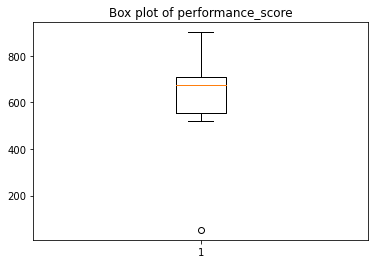

In [47]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance_score')

In [48]:
Q1 = np.percentile(data['performance_score'], 25, interpolation='midpoint')
Q2 = np.percentile(data['performance_score'], 50, interpolation='midpoint')
Q3 = np.percentile(data['performance_score'], 75, interpolation='midpoint')

In [51]:
Q1,Q2,Q3

(556.0, 674.0, 711.0)

In [52]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR

Identifying the outlier

In [53]:
outlier = []
for x in data['performance_score']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[53]

Thus data[6] has one outlier And we drop this

In [59]:
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,52000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [61]:
# Dropping the outliers from the dataset
mdata.drop(['James Authur'], inplace=True)

In [62]:
mdata

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


9.Check the gender column and do Dummy encoding

In [64]:
data1 = pd.get_dummies(mdata['gender'])
data1

,F,M
name,,
Allen Smith,0,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,0,0
Josh Wills,1,0
Leo Duck,0,1


10.Do the standard scaling on the feature performance score.

In [70]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit_transform(data[['performance_score']])

array([[ 0.5055651 ],
       [-0.40805254],
       [ 0.2850367 ],
       [-0.24603168],
       [ 0.45155814],
       [ 0.17252221],
       [-2.50982316],
       [ 1.30666824],
       [ 0.44255698]])

These are the scaled values.